# Wskazówki do symulacji losowych - Python

# Obliczenia wektorowe

In [1]:
# podstawowym narzędziem jest biblioteka NumPy
from numpy import *
from numpy.random import *

# wszystkie próby losowe staramy się zawsze trzymać w numpy.array
# ponieważ typ ten pozwala na dalsze obliczenia wektorowe
# zawsze możemy inicjalizować pustą tablicę

X = empty(1000,dtype = float)

# po czym wpisać w nie nasze wyniki w pętli

for k in range(1000):
    X[k] = rand()**2 # jakiś nasz algorytm

# generalnie jednak najlepiej korzystać z wbudowanych metod
# które są wektorowe i dużo szybsze niż pętle

X = rand(1000)**2 # równoważne powyższemu, ale dużo efektywniejsze i przejrzystsze

W numpy mamy wektorowe wersje wszystkich funkcji elementarne. Bardziej złożonych konstrukcji programistycznych często nie da się łatwo zwektoryzować

In [2]:
# wektorową wersją if jest numpy.where

U = rand(1000)
X = where(U>1/2, 1, -1) # kiedy U[k] > 1/2 X[k] = 1, przeciwnie -1

Niestety nie ma wektorowego for i while. Należy się w każdym przypadku z osobna zastanawiać, jak je zastąpić lub przynajmniej jak największą część operacji wykonywać wektorowo

In [3]:
# istnieje sztuczka składniowa, której można użyć - dekorator @vectorize

def f(x):
    while x < 10: # zawiera while zależny od x, nie jest wektorowe
        x *= 2
    return x

f(rand(10)) # błąd

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [4]:
@vectorize
def f(x):
    while x < 10: 
        x *= 2
    return x

f(rand(10)) # już ok

array([17.52529199, 15.26342525, 18.74378145, 10.85678482, 17.56229112,
       12.92769882, 18.06937341, 14.94989258, 15.7623654 , 15.28708109])

Niestety vectorize (wbrew nazwie!) nie przeprowadza obliczeń wektorowo. Zapewnia elegancką składnię, ale jest obliczany wolno. Metody numpy są zdecydowanie preferowane

# Zmienne losowe w NumPy oraz SciPy

In [9]:
# rand generuje U(0,1) w zadanej ilości
rand(10) # 10 zmiennych U(0,1)
rand(10,10); # macierz 10x10 zmiennych U(0,1)

In [6]:
# randn generuje N(0,1) w zadanej ilości
randn() # 1 N(0,1)
rand(1,10) # macierz 1x10 zmiennych N(0,1) (tzn. pojedynczy wiersz macierzy)

array([[0.18497625, 0.4017808 , 0.68548757, 0.34897652, 0.65788812,
        0.9066895 , 0.42247431, 0.44938636, 0.62120491, 0.38228998]])

In [7]:
# do liczb całkowitych z zakresu mamy randint

randint(1,5,100);

In [8]:
# jednostajnie wybierać z wektora możemy choice

tab = array([1,2.5,10])
choice([1,2.5,10],10) # z grubsza równoważne tab[randint(0,3,10)]

array([10. , 10. ,  1. ,  1. ,  1. ,  1. ,  1. ,  2.5,  1. ,  1. ])

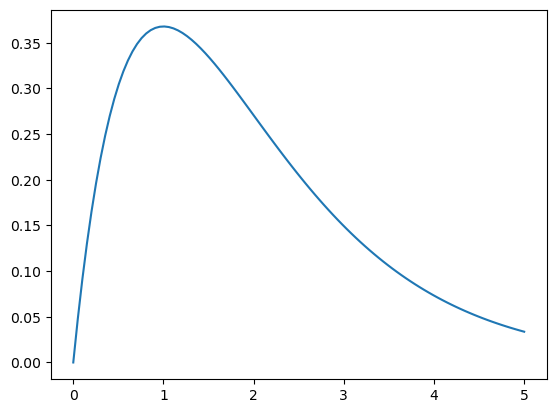

In [10]:
# więcej rozkładów mamy w scipy.stats
# lista rozkładów jest tutaj: https://docs.scipy.org/doc/scipy-0.16.0/reference/stats.html
from scipy.stats import *
from matplotlib.pyplot import *

# przykład

xs = linspace(0,5,100)

p = gamma.pdf(xs,2,0,1) # gęstość Gamma(2,0,1) od 0 do 5
plot(xs,p)
show()

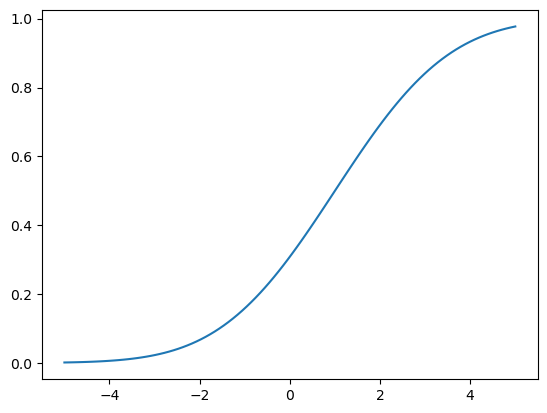

In [12]:
# dystrybuanta jest dostępna pod .cdf

xs = linspace(-5,5,100)

d = norm.cdf(xs,1,2) # cdf Normal(1,2) w punktacch xs
plot(xs,d)
show()

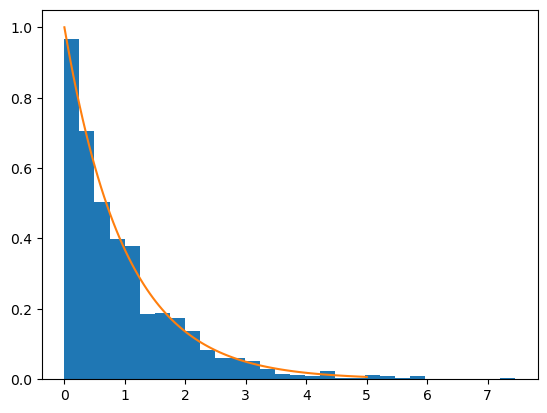

In [13]:
# generowanie zmiennych losowych pod .rvs

X = expon.rvs(0,1,1000) # 1000 zmiennyc Exp(1)
hist(X,bins=30,density = True)
xs = linspace(0,5,100)
plot(xs,expon.pdf(xs))  # exp(-xs) w tym przypadku

In [14]:
# znajdowanie parametrów metodą .fit

X = 2*randn(1000)+1 # rozkład N(1,2)

norm.fit(X) # powinny wyjść parametry (1,2)

# im większa próba, tym wynik powinien być dokładniejszy

(0.9949907714485942, 2.0012247425910528)

# Statystyki opisowe

Jak nazwa wskazuje są to metody, które pomagają nam zwizualizować zachowanie zmiennych i procesów losowych. Następnie możemy zweryfikować, czy zachowanie to jest spodziewane, czy też nie. 

Proszę pamiętać, że statystyki podobnie jak i próby są losowe i ich wynik nie jest dokładny. Powinny jednak zbiegać do dokładnego wyniku w kontrolowany sposób, zwykle wraz ze wzrostem próby losowej

In [15]:
# najprostszą formą statystyk są momenty

X = randn(1000) + 1 # Normal(1,1)
print(mean(X)) # pierwszy moment, powinien być bliko 1
print(mean(X**2)) # drugi moment, powinien być bliko 2
print(var(X)) # wariancja, powinna być blisko 1
print(std(X)) # odchylenie średniokwadratowe. tj. pierwiastek z wariancji

1.032685223538777
2.0594181615240603
0.9929793906087268
0.9964835124620611


In [16]:
# zależność możemy badać za pomocą korelacji

X = randn(1000)
Y = randn(1000)

# corrcoef zwraca macierz korelacji


print(corrcoef(X,Y)) # korelacja X z Y to elementy 1,2 i 2,1; jak widzimy bliskie 0

[[ 1.        -0.0606847]
 [-0.0606847  1.       ]]


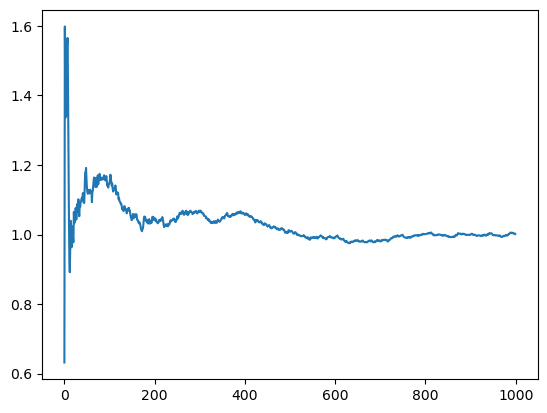

In [17]:
# co do zbieżności, możemy to zilustrować

X = randn(1000) + 1

walkingMean = cumsum(X)/(arange(1,1001)) # elementy to  (x1+..+xk)/k

plot(walkingMean) # jak widać zbiega do 1

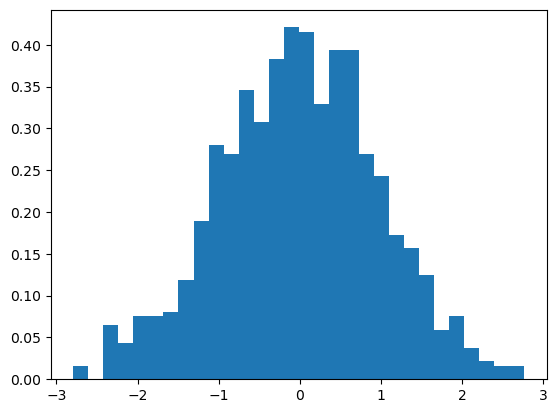

In [19]:
# znamy już histogram, który jest estymatorem gęstości

hist(randn(1000),bins=30,density=True);

W przypadku robienia histogramu należy uważać na ilość belek. Zbyt mała zniekształca kształ uzyskanego pdfu, ale zbyt duża sprawia, że pojawia się chaotyczne zachowanie. Optymalna ilość belek niestety zależy od rozkładu, więc nie ma dokładnych wytycznych, ale warto nie odchodzić zbyt daleko od pierwiastka długości próby.

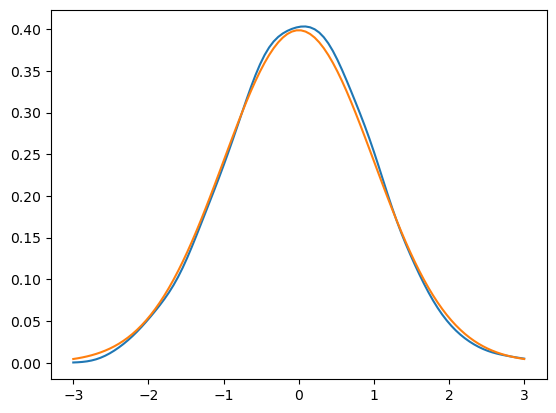

In [20]:
# alternatywą do histogramu jest jądrowy estymator pdf
# działa on dobrze dla zmiennych o gładkich gęstościach
# i krótkich ogonach
# dla dobrego działania może wymagać długich prób losowych
# w Pythonie mamy scipy.stats.gaussian_kde

den = gaussian_kde(randn(1000)) # rozkład Normalny jest gładki
xs = linspace(-3,3,100)
plot(xs,den(xs)) # estymowane
plot(xs,norm.pdf(xs,0,1)) # dokładne

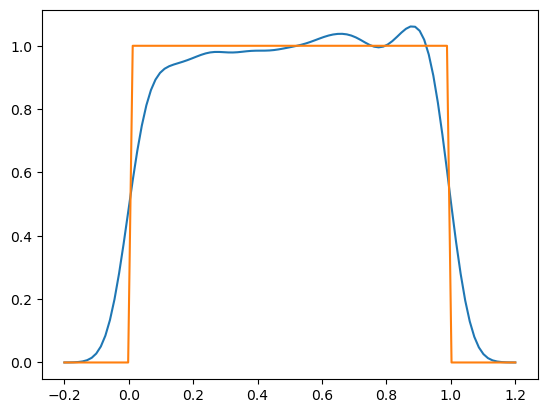

In [21]:
# jak widzimy dla rozkładu U(0,1) ze skokami
# estymator robi błędy w otoczeniu skoków
# które zanikają wolno wraz ze wzrostem długości próby

den = gaussian_kde(rand(5000))
xs = linspace(-0.2,1.2,100)
plot(xs,den(xs)) # estymowane
plot(xs,uniform.pdf(xs,0,1)) # dokładne

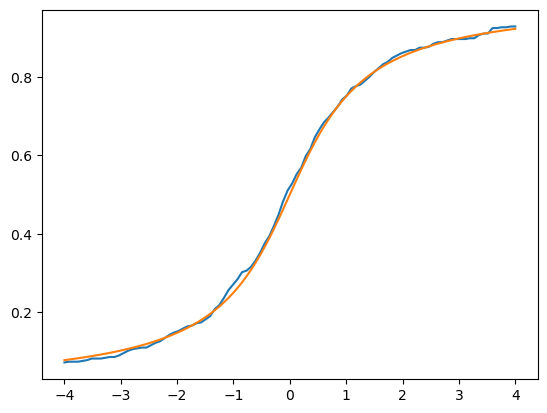

In [22]:
# z kolei cdf jest bardzo łatwy do estymowania
# wymaga relatywnie krótkich prób losowych
# można użyć prostej funkcji ecdf

from  statsmodels.distributions.empirical_distribution import ECDF

X = cauchy.rvs(0,1,500)
e = ECDF(X)

xs = linspace(-4,4,100)

plot(xs,e(xs)) # estymowane
plot(xs,cauchy.cdf(xs,0,1)) # teoretyczne

# Testy statystyczne

Testami odpowiadamy na pytanie, czy badana próba zdradza odchylenia od zadanej własności,czy też klasy. Wynik testu również jest losowy, więc gdy sami symulujemy warto go powtórzyć kilkukrotnie, jak też porównywać wyniki kilku testów

Testy zwracają tzw. p-wartość, czyli oszacowane prawdopodobieństwo, że badany odchył cechy może być dziełem przypadku. Duża p-wartość oznacza więc "w normie" a mała potwierdza występowanie osobliwości. Za próg istotności odchyleń zwykle przyjmuje się 0.05, ale w przypadku symulacji warto myśleć nawet o mniejszych wartościach jak 0.005.

In [23]:
# najważniejszym testem, jakiego będziemy używać jest test Kołmogorova-Smirova
# sprawdza on, czy próba ma dystrybuantę jak zadana

# w Pythonie scipy.stats.kstest

X = randn(1000)
kstest(X,'norm') # p-val = 0.15 to dużo, nie ma odchyleń od rozkładu Normal(0,1)

KstestResult(statistic=0.03944208413089664, pvalue=0.08672800856174989)

In [109]:
X = expon.rvs(0,1,1000)
kstest(X,'norm') # p-val jest bardzo małe, wykryto odchylenia od rozkładu Normal(0,1)

KstestResult(statistic=0.5000677751237476, pvalue=9.120374763392512e-232)

In [110]:
X = expon.rvs(0,1,1000)
kstest(X,'expon') # p-val = 0.6 to dużo, nie ma odchyleń od Exp(1)

KstestResult(statistic=0.0259517391659585, pvalue=0.5109139474055996)

In [111]:
X = randn(1000) + 1
kstest(X,'norm') # p-val jest bardzo małe, wykryto odchylenia od rozkładu Normal(0,1)

KstestResult(statistic=0.39026305004338313, pvalue=1.0931810244116137e-137)

In [19]:
# jeżeli chcemy testować ogólny rozkład, musimy podać testowany cdf jako funkcję x

X = 2*randn(1000) + 1

kstest(X, cdf = lambda x: norm.cdf(x,1,2)) # cdf rozkładu Normal(1,2)

KstestResult(statistic=0.01883909546151763, pvalue=0.8698668729750731)

Za pomocą testu K-S możemy więc weryfikować, czy próba jest z rozkładu dokładnie takiego, jak zadany. Nie możemy za jego pomocą sprawdzić, czy próba jest z zadanej klasy rozkładów, np. czy jest z dowolnego rozkładu normalnego, a nie tylko jakiegoś konkretnego, np. Normal(0,1). Czasami można próbę przekształcić, aby uniknąć tego problemu. W ogólności trzeba jednak używać innych testów.

Test  Jarque-Bery sprawdza, czy momenty próby zgadzają się z momentami rozkładu normalnego.

In [112]:
# w Pythonie scipy.stats.jarque_bera

X = 2*randn(1000) + 2

jarque_bera(X) # nie ma odchyleń

(0.02098652430355227, 0.9895616000613063)

In [113]:
X = laplace.rvs(0,1,1000) # rozkład Laplace(0,1)
jarque_bera(X) # są odchylenia

(233.23551816438876, 0.0)

In [114]:
X = randn(1000) + rand(1000)

jarque_bera(X) # nie ma odchyleń, a powinny
# większość testów da się oszukać

(0.5280947725279339, 0.7679371491220489)

In [115]:
X = randn(1000) + 5*rand(1000)

jarque_bera(X)  # zwiększone zaburzenie już wychwytuje

(11.102124728964833, 0.0038833295399247625)